<a href="https://colab.research.google.com/github/hikmahabdillah/PCVK_Ganjil_2025/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRAKTIKUM

Nama: Hikmah Aldrin Abdillah

Kelas: 3A

NIM: 2341720049

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

main_img = 'drive/MyDrive/PCVK_MM/estevao.jpg'

1. Buat Gamma Correction

Saving estevao.jpg to estevao (2).jpg
 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


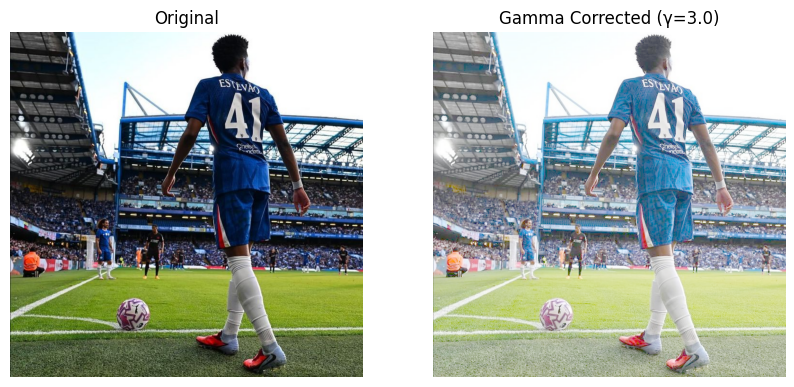

In [4]:
from google.colab import files
uploaded = files.upload()

img = cv.imread(main_img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

gamma_corrected = np.array(255 * (img / 255) ** (1 / gamma), dtype='uint8')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gamma_corrected)
plt.title(f'Gamma Corrected (γ={gamma})')
plt.axis('off')

plt.show()

2. Buat Simulasi Image Depth

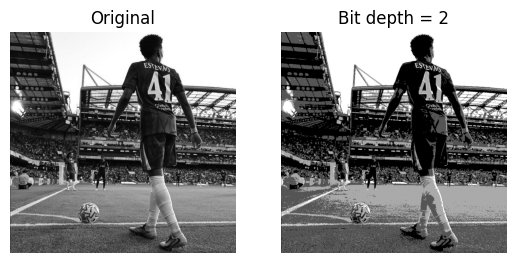

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# pakai gambar yang sudah kamu upload sebelumnya
original = cv.imread(main_img, cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)

# proses kuantisasi sesuai jobsheet
depth_image = np.round(original / level) * level
depth_image = depth_image.astype(np.uint8)

# tampilkan hasil
plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(depth_image, cmap='gray')
plt.title(f"Bit depth = {bit_depth}")
plt.axis('off')
plt.show()

3. Buat modul Average Denoising

Jumlah gambar noisy terbaca: 3


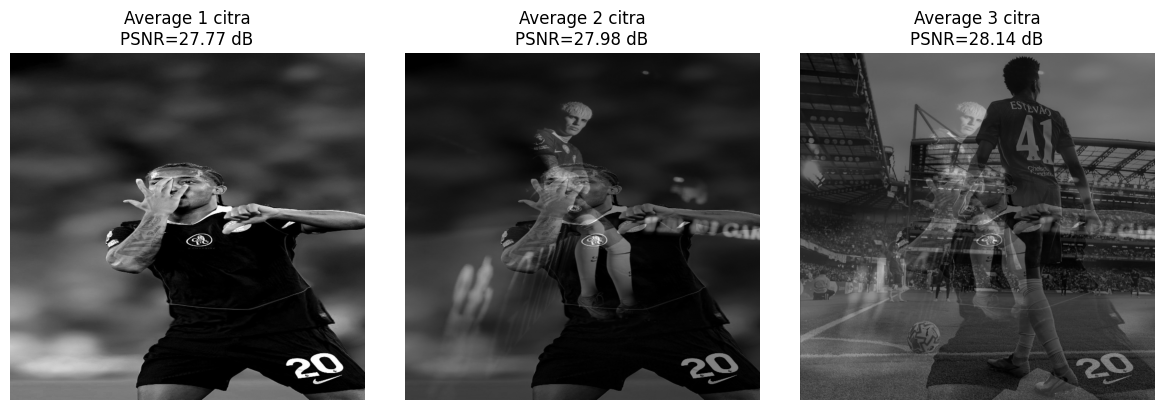

   Jumlah Citra  PSNR (dB)
0             1  27.765154
1             2  27.977857
2             3  28.139047


In [9]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
from math import log10, sqrt
import pandas as pd

# Fungsi hitung PSNR
def PSNR(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# 1. Baca gambar asli
original = cv.imread(main_img, cv.IMREAD_GRAYSCALE)

# 2. Baca semua gambar noisy (hanya 3)
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/*.jpg'):
    n = cv.imread(img, cv.IMREAD_GRAYSCALE)
    if n is not None:
        n = cv.resize(n, (original.shape[1], original.shape[0]))
        cv_img.append(n)

cv_img = np.array(cv_img)
print("Jumlah gambar noisy terbaca:", len(cv_img))

# 3. Lakukan denoising dengan averaging
jumlah_list = [1, 2, 3]  # hanya sampai jumlah gambar yang ada
psnr_results = []

plt.figure(figsize=(12,4))

for idx, jumlah in enumerate(jumlah_list, 1):
    avg_img = np.mean(cv_img[:jumlah], axis=0)
    avg_img = np.array(avg_img, dtype=np.uint8)

    psnr_val = PSNR(original, avg_img)
    psnr_results.append((jumlah, psnr_val))

    # tampilkan hasil
    plt.subplot(1, 3, idx)
    plt.imshow(avg_img, cmap='gray')
    plt.title(f'Average {jumlah} citra\nPSNR={psnr_val:.2f} dB')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 4. Tabel hasil PSNR
df = pd.DataFrame(psnr_results, columns=['Jumlah Citra', 'PSNR (dB)'])
print(df)


4. Buat image masking

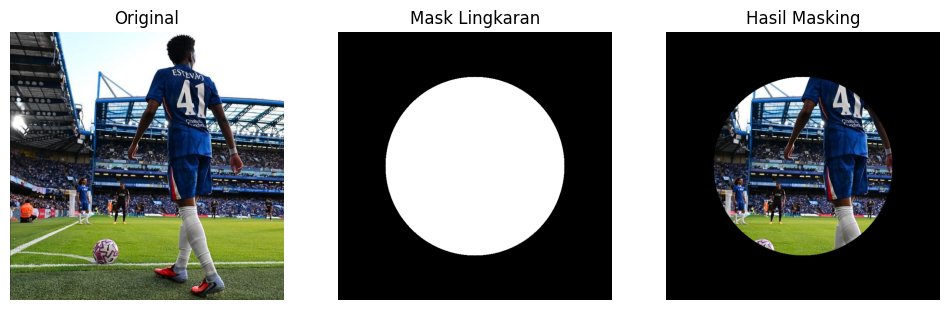

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv.imread(main_img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Buat mask kosong
mask = np.zeros(img.shape[:2], dtype="uint8")

# Tambahkan lingkaran penuh di tengah
center = (img.shape[1]//2, img.shape[0]//2)
radius = min(img.shape[0], img.shape[1])//3
cv.circle(mask, center, radius, 255, -1)

# Masking
masked = cv.bitwise_and(img, img, mask=mask)

# Tampilkan hasil
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(mask, cmap="gray"); plt.title("Mask Lingkaran"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(masked); plt.title("Hasil Masking"); plt.axis("off")
plt.show()

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu

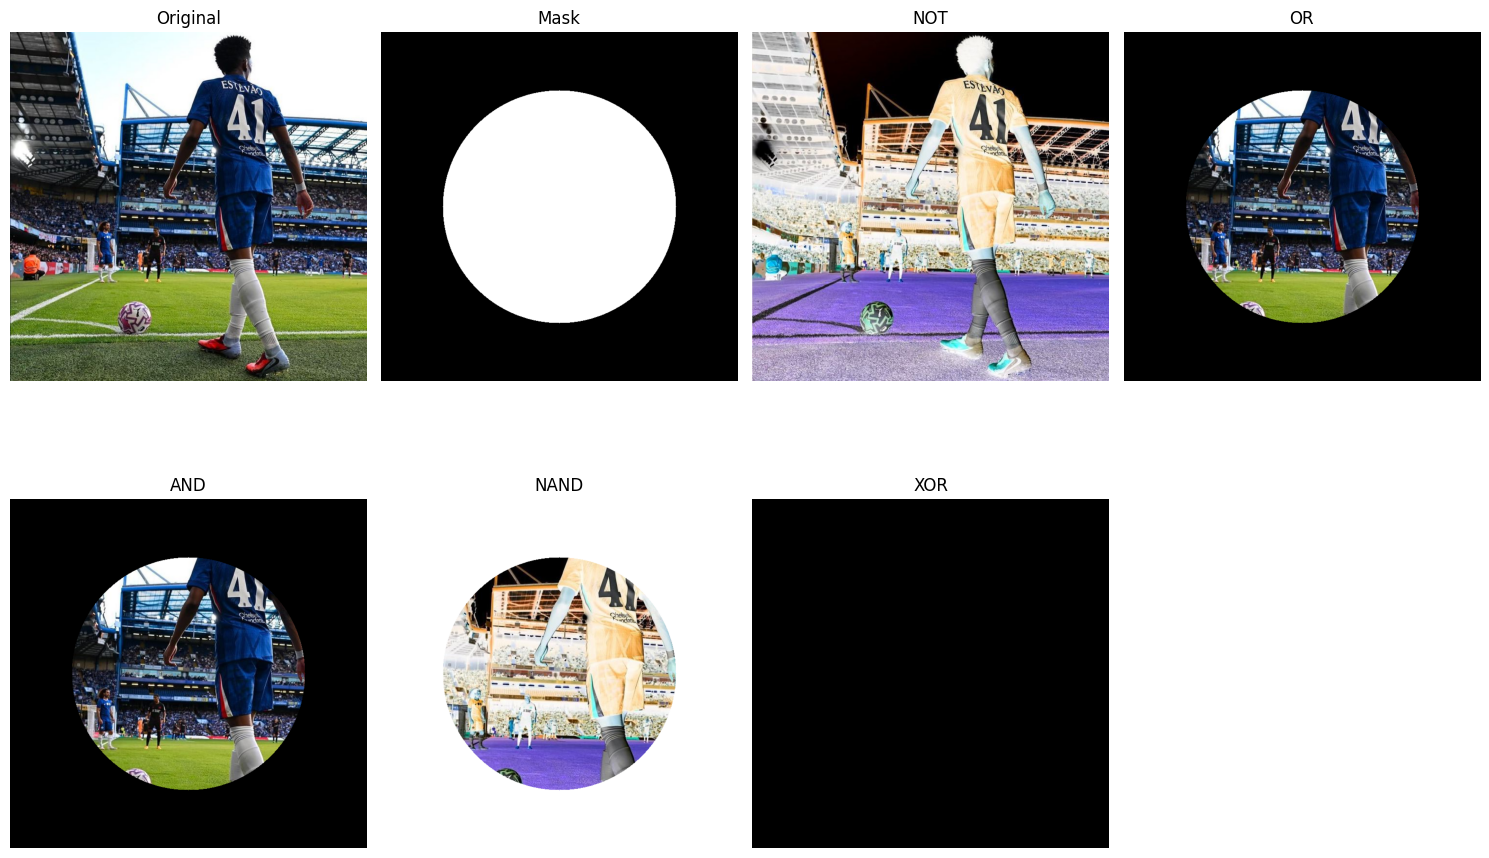

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar asli
img = cv.imread(main_img)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# 2. Buat mask (lingkaran putih di tengah)
mask = np.zeros(img.shape[:2], dtype="uint8")
center = (img.shape[1]//2, img.shape[0]//2)
radius = min(img.shape[0], img.shape[1])//3
cv.circle(mask, center, radius, 255, -1)

# 3. Operator logika
not_img  = cv.bitwise_not(img)                        # NOT / komplemen
or_img   = cv.bitwise_or(img, img, mask=mask)         # OR
and_img  = cv.bitwise_and(img, img, mask=mask)        # AND
nand_img = cv.bitwise_not(and_img)                    # NAND = NOT(AND)
xor_img  = cv.bitwise_xor(img, img, mask=mask)        # XOR

# 4. Tampilkan hasil
titles = ["Original", "Mask", "NOT", "OR", "AND", "NAND", "XOR"]
images = [img, mask, not_img, or_img, and_img, nand_img, xor_img]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(2,4,i+1)
    if i==1:  # mask tampil grayscale
        plt.imshow(images[i], cmap="gray")
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


Hasil analisa:
Gamma correction digunakan untuk mengatur kecerahan/kontras citra dengan transformasi non-linear.

Bit depth berpengaruh pada jumlah gradasi warna: semakin rendah bit depth, semakin sederhana citra.

Average denoising terbukti bisa mengurangi noise acak, dan PSNR menjadi metrik penting untuk mengukur kualitas hasil.

Image masking dengan operator logika memungkinkan manipulasi citra berbasis area/region tertentu.

Operator logika (NOT, OR, AND, NAND, XOR) memberi efek berbeda, dan dapat dimanfaatkan untuk berbagai aplikasi pengolahan citra seperti filtering, segmentasi, dan analisis citra.